In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import plotly.express as px
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tanveer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tanveer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tanveer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data = pd.read_csv('emails.csv')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
spam,5728.0,0.238827,0.426404,0.0,0.0,0.0,0.0,1.0


In [13]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [15]:
# Renaming columns
data=data.rename(columns={'spam':'label'})

In [20]:
counts = data['label'].value_counts().reset_index()
counts.columns = ['Label', 'Count']
# Creating a bar plot using Plotly Express
fig = px.bar(counts, x='Label', y='Count')
fig.update_layout(title='Number of Spam and Ham Emails', xaxis_title='Label', yaxis_title='Count')
fig.update_xaxes(tickvals=[0, 1], ticktext=['Ham', 'Spam'])
fig.show()

In [21]:
def preprocess_text(text):
    # Remove punctuation
    no_punctuation = ''.join([char for char in text if char not in string.punctuation])

    # Lowercase the text
    no_punctuation_lower = no_punctuation.lower()

    # Tokenize the text into words
    words = nltk.word_tokenize(no_punctuation_lower)

    # Remove stopwords and non-alphabetic characters, and lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stopwords.words('english') and word.isalpha()]

    # Join the lemmatized words back into a sentence
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

1. Remove punctuations , 2. Lowering the case, 3. Identify and remove stop words and 4. Lemmatization

In [29]:
data["preprocessed_text"] = data["text"].apply(preprocess_text)
data.head()

,text,label,preprocessed_text
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new home made easy im wan...
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,subject money get software cd software compati...


In [31]:
#  Feature Selection
# Using TF-IDF Vectorization to transform the data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['preprocessed_text'])
y = data['label']

In [33]:
# Applying Spam Filter Algorithms
# Spliting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"train dataset features size: {X_train.shape}")
print(f"train dataset label size: {y_train.shape}")

print(f"test dataset features size: {X_test.shape}")
print(f"test dataset label size: {y_test.shape}")

train dataset features size: (4009, 30757)
train dataset label size: (4009,)
test dataset features size: (1719, 30757)
test dataset label size: (1719,)


In [36]:
# Initializing models
models = {
    'Naive Bayes (Multinomial)': MultinomialNB(),
    'Decision Tree (J48 equivalent)': DecisionTreeClassifier(),
    'SVM model': SVC(),
    'Random Forest model': RandomForestClassifier()
}

Model: Naive Bayes (Multinomial)
Accuracy: 0.8795811518324608
Confusion Matrix:
 [[1277    1]
 [ 206  235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      1278
           1       1.00      0.53      0.69       441

    accuracy                           0.88      1719
   macro avg       0.93      0.77      0.81      1719
weighted avg       0.90      0.88      0.87      1719


--------------------------------------------------



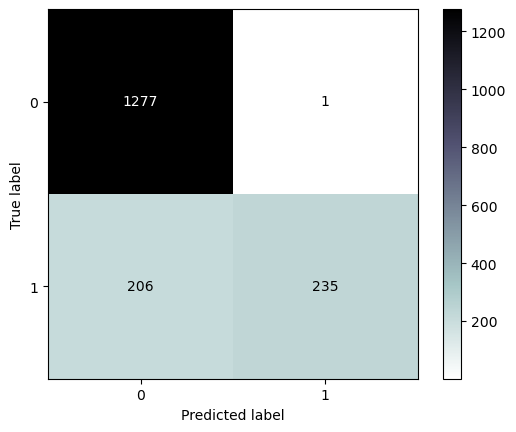

Model: Decision Tree (J48 equivalent)
Accuracy: 0.9604421175101804
Confusion Matrix:
 [[1247   31]
 [  37  404]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1278
           1       0.93      0.92      0.92       441

    accuracy                           0.96      1719
   macro avg       0.95      0.95      0.95      1719
weighted avg       0.96      0.96      0.96      1719


--------------------------------------------------



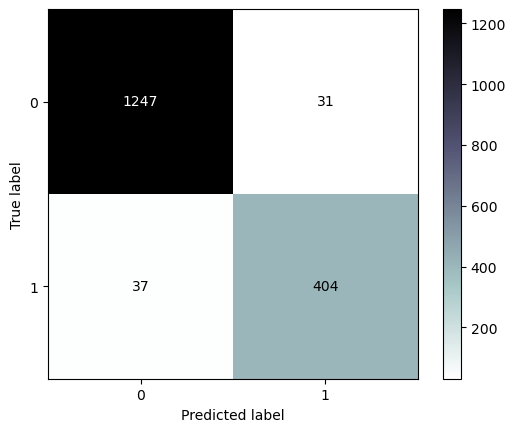

Model: SVM model
Accuracy: 0.9808027923211169
Confusion Matrix:
 [[1275    3]
 [  30  411]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1278
           1       0.99      0.93      0.96       441

    accuracy                           0.98      1719
   macro avg       0.98      0.96      0.97      1719
weighted avg       0.98      0.98      0.98      1719


--------------------------------------------------



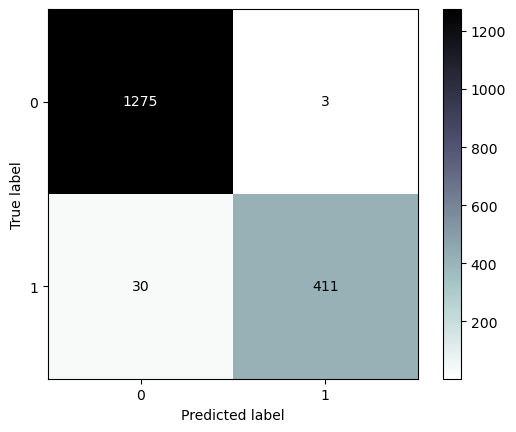

Model: Random Forest model
Accuracy: 0.970913321698662
Confusion Matrix:
 [[1277    1]
 [  49  392]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1278
           1       1.00      0.89      0.94       441

    accuracy                           0.97      1719
   macro avg       0.98      0.94      0.96      1719
weighted avg       0.97      0.97      0.97      1719


--------------------------------------------------



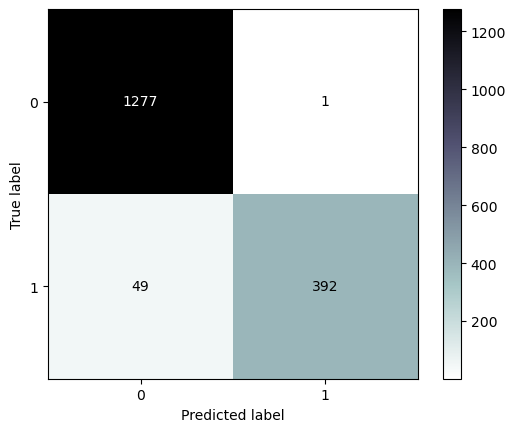

In [42]:
# Dictionary to hold accuracy scores
accuracy_scores = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Evaluate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    # Print Results
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='bone_r')  
    plt.show()

In [43]:
#  Comparing Algorithms
print("Comparison of Algorithms:")
for name, accuracy in accuracy_scores.items():
    print(f"{name}: {accuracy:.4f}")

Comparison of Algorithms:
Naive Bayes (Multinomial): 0.8796
Decision Tree (J48 equivalent): 0.9604
SVM model: 0.9808
Random Forest model: 0.9709


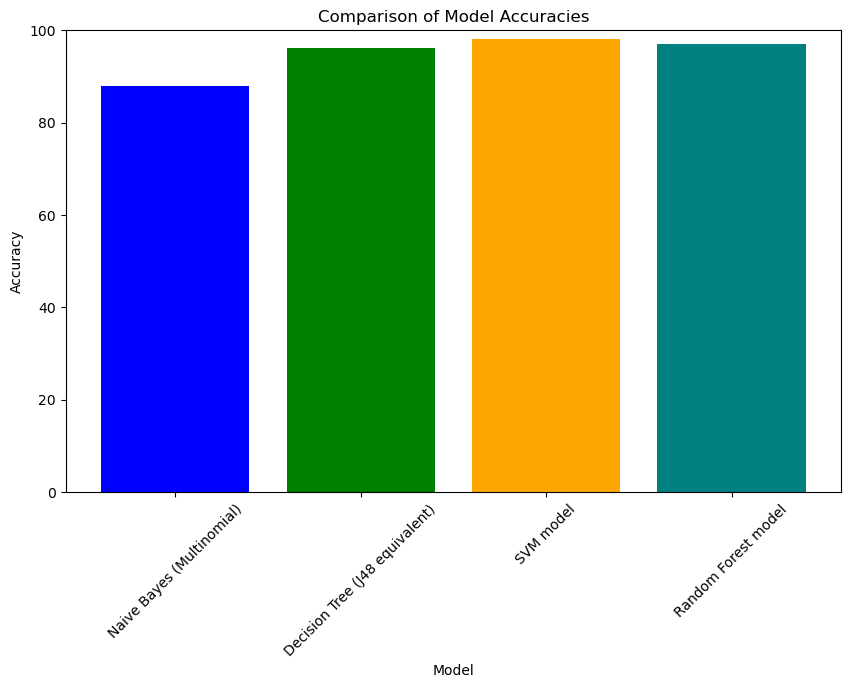

In [50]:
#  Comparing Algorithms with Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), [acc * 100 for acc in accuracy_scores.values()], color=['Blue', 'Green', 'Orange', 'Teal'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()